## Comparing Viterbi based method and Combinatorial Optimization on Equota Data

### Import libraries

In [1]:
%matplotlib inline
import json
import numpy as np
import scipy as sp
import datetime
import matplotlib.pyplot as plt
import operator
import os
import pandas as pd
import sys
import string
import copy
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import operator
import seaborn as sns
import operator
from collections import defaultdict

In [2]:
from influxdb import DataFrameClient
client = DataFrameClient(
    host = "120.132.6.207",
    username = "svcuser",
    password = "svcuser",
    database = "weather"
)
df = client.query("select * from TS2 order by time desc limit 1000")[u'TS2']

### Import BCP

In [3]:
# change the following path to your local repository of energyanalytics
mod_path = '/Users/Simo/Documents/EquotaCode/Disaggregation/disaggregation/energyanalytics/source/disaggregation'
if not (mod_path in sys.path):
    sys.path.insert(0, mod_path)
    
from bayesian_cp_detect import bayesian_cp_3 as bcp
from bayesian_cp_detect import cp_detect
# make sure that the code is loaded to the lastest version
reload(bcp)

<module 'bayesian_cp_detect.bayesian_cp_3' from '/Users/Simo/Documents/EquotaCode/Disaggregation/disaggregation/energyanalytics/source/disaggregation/bayesian_cp_detect/bayesian_cp_3.pyc'>

### Visualize the data

['2', '3', '4', '6', '11']


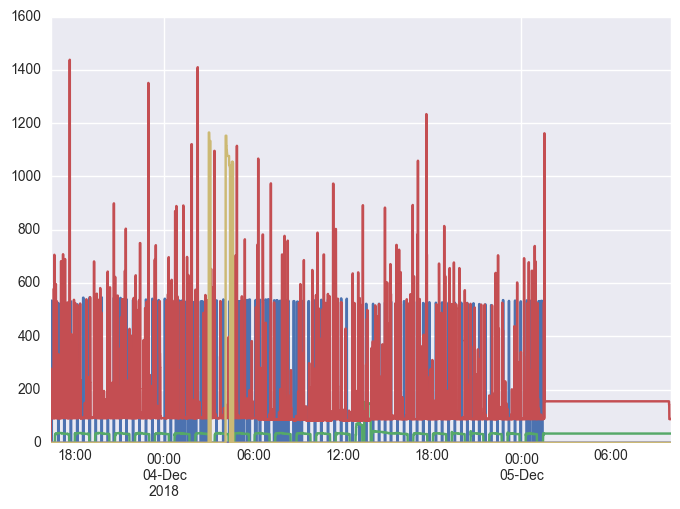

In [12]:
print test.appliance_list
test_data["2"].plot()
#plt.plot([1000 if i >0 else 0 for i in ans[2][:1000]])
#plt.plot([1000 if i >0 else 0 for i in test_data["4"].values[:1000]])
test_data["3"].plot()
test_data["4"].plot()
test_data["6"].plot()
test_data["11"].plot()

## Bayesian Method

In [4]:
# change the following path to your local repository of energyanalytics
mod_path = '/Users/Simo/Documents/EquotaCode/Disaggregation/disaggregation/energyanalytics/source/disaggregation'
import pandas as pd
if not (mod_path in sys.path):
    sys.path.insert(0, mod_path)
import Util
reload(Util)
test = Util.EquotaData()
test.get_appliance_data()
test.compute_total(appliance_list = test.appliance_list)
test_data = pd.concat([test.data[app]["P"].fillna(method='ffill') for app in test.appliance_list], axis=1, keys=test.appliance_list).fillna(method = "ffill").resample("30S").pad().fillna(0)
test_data["total"] = test_data.sum(axis=1)
reload(Util)
temp = Util.BayesianNILM({"1":[0,550],"2":[0,40],"3":[0,600,1000],"4":[0,1200]})
#ans = temp.test_power_disaggregate(test_data["total"].values)

In [5]:
reload(Util)
temp = Util.BayesianNILM({"2":[0,550],"3":[0,40],"4":[0,600,1000],"11":[0,1200]})
temp.train({i: test_data[i].values for i in ["2","3","4","11"]})
ans = temp.power_disaggregate(test_data["total"].values)


In [28]:
temp.PY

defaultdict(float,
            {'0 0 0 0': 0.1773645270945811,
             '0 0 0 1': 0.016796640671865627,
             '0 0 0 2': 0.003999200159968006,
             '0 0 1 0': 0.021595680863827234,
             '0 0 1 1': 0.001999600079984003,
             '0 0 1 2': 0.0003999200159968006,
             '0 1 0 0': 100.0,
             '0 1 0 1': 100.0,
             '0 1 0 2': 100.0,
             '0 1 1 0': 100.0,
             '0 1 1 1': 100.0,
             '0 1 1 2': 100.0,
             '1 0 0 0': 0.003199360127974405,
             '1 0 0 1': 0.0011997600479904018,
             '1 0 1 0': 0.001999600079984003,
             '1 1 0 0': 100.0,
             '1 1 1 0': 100.0})

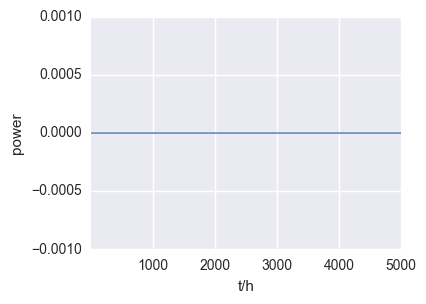

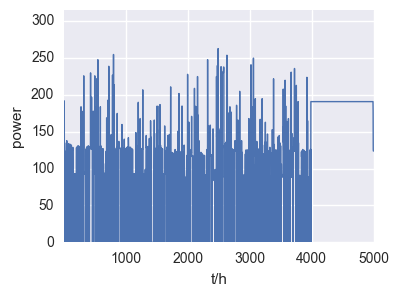

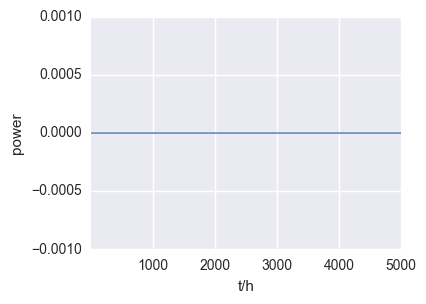

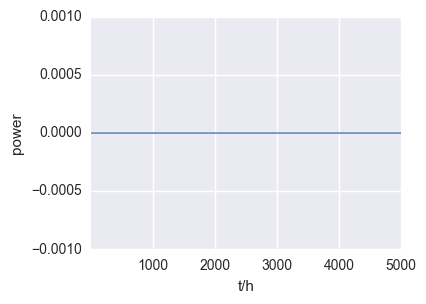

In [26]:
period = 5001
for i in range(len(ans)):
    plot_dissagregation([ans[i]],np.array([i+1 for i in range(max(period,len(ans[i])))]))

In [11]:
reload(Util)
# if an appliance is not on for the whole time period then passing it to the F1Score will cause division by 0
mapping_relation = {0:"2",1:"3",2:"4",3:"11"}
F1list = [Util.util.F1Score(ans[i],test_data[mapping_relation[i]].values) for i in mapping_relation]
RMSElist = [Util.util.RMSE(ans[i],test_data[mapping_relation[i]].values) for i in mapping_relation]

4 14
500 4483
0.222222222222 0.00793650793651
3114 112
746 1029
0.965282083075 0.806735751295
0 0


ZeroDivisionError: float division by zero

### Combinatorial Optimization

In [14]:
# change the following path to your local repository of energyanalytics
mod_path = '/Users/Simo/Documents/EquotaCode/Disaggregation/disaggregation/energyanalytics/source/disaggregation'
import pandas as pd
if not (mod_path in sys.path):
    sys.path.insert(0, mod_path)
import Util
reload(Util)
test = Util.EquotaData()
test.get_appliance_data()
test.compute_total(appliance_list = test.appliance_list)
test_data = pd.concat([test.data[app]["P"].fillna(method='ffill') for app in test.appliance_list], axis=1, keys=test.appliance_list).fillna(method = "ffill").resample("30S").pad().fillna(0)
test_data["total"] = test_data.sum(axis=1)
reload(Util)
temp = Util.CombinatorialOptimization({"1":[0,550],"2":[0,40],"3":[0,600,1000],"4":[0,1200]})
ans = temp.test_power_disaggregate(test_data["total"].values)


5001 5001


504

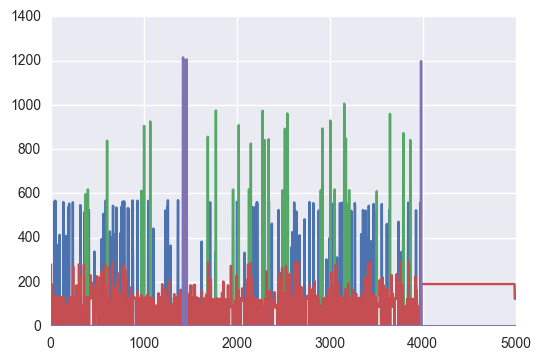

In [15]:
#plt.plot(ans[0][1000:2000])
#plt.plot(test_data["2"].values[1000:2000])
for i in range(len(ans)):
    plt.plot(ans[i])
#plt.plot(test.data["4"]["P"].values)
#test.data["2"]["P"].plot()
#test.data["temp"] = ans[0]
#test.data["temp"].plot()
#sum([1 if ans[0][i]>0 else 0 for i in range(len(ans[0]))])
sum([1 if test_data["2"][i]>0 else 0 for i in range(len(ans[0]))])

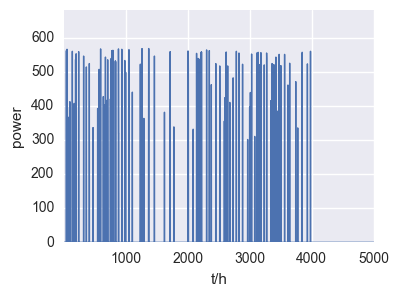

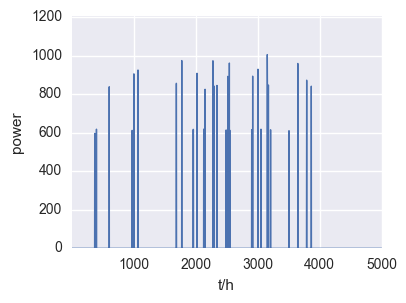

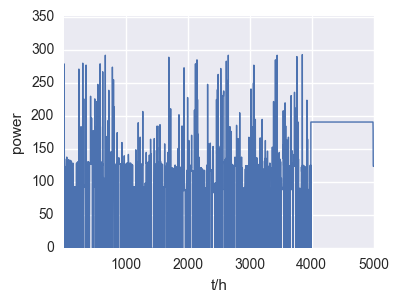

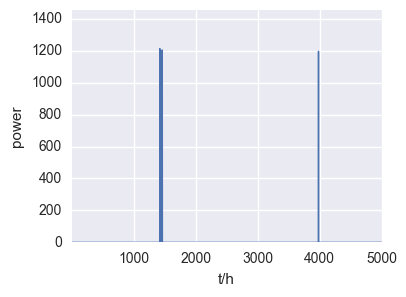

In [18]:
period = 1999
for i in range(len(ans)):
    plot_dissagregation([ans[i]],np.array([i+1 for i in range(max(period,len(ans[i])))]))

## Analytics

In [19]:
reload(Util)
# if an appliance is not on for the whole time period then passing it to the F1Score will cause division by 0
mapping_relation = {0:"2",1:"3",2:"4",3:"11"}
F1list = [Util.util.F1Score(ans[i],test_data[mapping_relation[i]].values) for i in mapping_relation]
RMSElist = [Util.util.RMSE(ans[i],test_data[mapping_relation[i]].values) for i in mapping_relation]

0 230
504 4267
0.0 0.0
38 42
3822 1099
0.475 0.00984455958549
4010 0
990 1
1.0 0.802
16 2
42 4941
0.888888888889 0.275862068966


In [27]:
RMSElist 

[198.52661644352048,
 102.23500770597062,
 201.10961435148516,
 104.13115451454426]

### Viterbi Based Method

In [13]:
cluster_mean_art  = [[550]*3,[40]*3,[600]*3,[1000]*3]
y_all = test_data["total"].values

/Users/Simo/Documents/EquotaCode/Disaggregation/disaggregation/energyanalytics/source/disaggregation/bayesian_cp_detect/bayesian_cp_3.py:235: RuntimeWarning: divide by zero encountered in log
  log_prob_grow[i_shape] = [np.log(new_cp_prob)] + log_prob[i_shape][:-1] + [ log_prob[i_shape][-1]+H ]


[0, 6, 18, 24, 30, 36, 42, 50, 56, 68, 80, 86, 92, 99, 110, 134, 140, 146, 174, 188, 210, 234, 240, 258, 264, 276, 282, 288, 294, 300, 308, 340, 346, 352, 358, 368, 376, 388, 394, 400, 406, 442, 448, 454, 460, 466, 492, 498, 504, 522, 544, 550, 556, 598, 616, 624, 650, 656, 662, 668, 674, 680, 686, 695, 701, 707, 716, 722, 752, 758, 764, 788, 794, 804, 836, 845, 851, 866, 872, 878, 884, 890, 897, 903, 909, 915, 921, 927, 933, 939, 949, 955, 961, 970, 976, 982, 988, 997, 1004, 1010, 1016, 1022, 1029, 1054, 1064, 1070, 1076, 1084, 1090, 1096, 1104, 1110, 1116, 1122, 1136, 1148, 1154, 1160, 1166, 1172, 1180, 1190, 1197, 1203, 1232, 1238, 1244, 1254, 1264, 1271, 1277, 1283, 1289, 1295, 1301, 1307, 1316, 1322, 1330, 1336, 1342, 1354, 1374, 1380, 1386, 1420, 1428, 1434, 1440, 1451, 1457, 1463, 1471, 1477, 1483, 1489, 1495, 1501, 1507, 1513, 1519, 1525, 1531, 1542, 1548, 1590, 1596, 1602, 1616, 1622, 1628, 1635, 1641, 1657, 1663, 1670, 1676, 1682, 1688, 1694, 1700, 1706, 1712, 1734, 1740, 174

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/numpy/core/_methods.py:55: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/numpy/core/_methods.py:67: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Simo/Documents/EquotaCode/Disaggregation/disaggregation/energyanalytics/source/disaggregation/bayesian_cp_detect/bayesian_cp_3.py:426: RuntimeWarning: divide by zero encountered in long_scalars
  distance_dict = {k:v/z for k,v in distance_dict.items()}


{(1, 0, 1, 1): (0, -1, 0, 0), (1, 1, 0, 1): (0, 0, -1, 0), (1, 0, 0, 0): (0, -1, 0, 0), (0, 1, 1, 0): (-1, 0, 0, 0), (1, 0, 1, 0): (0, -1, 0, 0), (0, 0, 0, 1): (-1, -1, 0, 0), (0, 0, 1, 1): (0, -1, 0, 0), (1, 0, 0, 1): (0, -1, 0, 0), (0, 1, 0, 0): (-1, 0, 0, 0), (1, 1, 1, 1): (1, 1, 1, 1), (0, 0, 0, 0): (-1, 0, 0, 0), (0, 0, 1, 0): (0, -1, 0, 0), (0, 1, 0, 1): (-1, 0, 0, 0), (1, 1, 1, 0): (1, 0, 0, 0), (0, 1, 1, 1): (-1, 0, 0, 0), (1, 1, 0, 0): (0, 0, -1, 0)}
{(1, 0, 1, 1): (0, 0, 1, 0), (1, 1, 0, 1): (1, 0, 0, 0), (1, 0, 0, 0): (1, 0, 0, 0), (0, 0, 0, 0): (0, -1, -1, -1), (1, 0, 1, 0): (0, 0, 1, 0), (0, 0, 0, 1): (0, 0, 0, 1), (0, 1, 0, 1): (0, 0, 0, 1), (1, 0, 0, 1): (0, 0, 0, 1), (0, 1, 0, 0): (-1, 0, -1, 0), (1, 1, 1, 1): (0, 0, 1, 0), (0, 1, 1, 0): (0, 0, 1, 0), (0, 0, 1, 0): (0, 0, 1, 0), (0, 0, 1, 1): (0, 0, 0, 1), (1, 1, 1, 0): (0, 0, 1, 0), (0, 1, 1, 1): (0, 0, 1, 0), (1, 1, 0, 0): (1, 0, 0, 0)}
{(1, 0, 1, 1): (1, 0, 0, 0), (1, 1, 0, 1): (0, 1, 0, 0), (1, 0, 0, 0): (0, -1, -1,

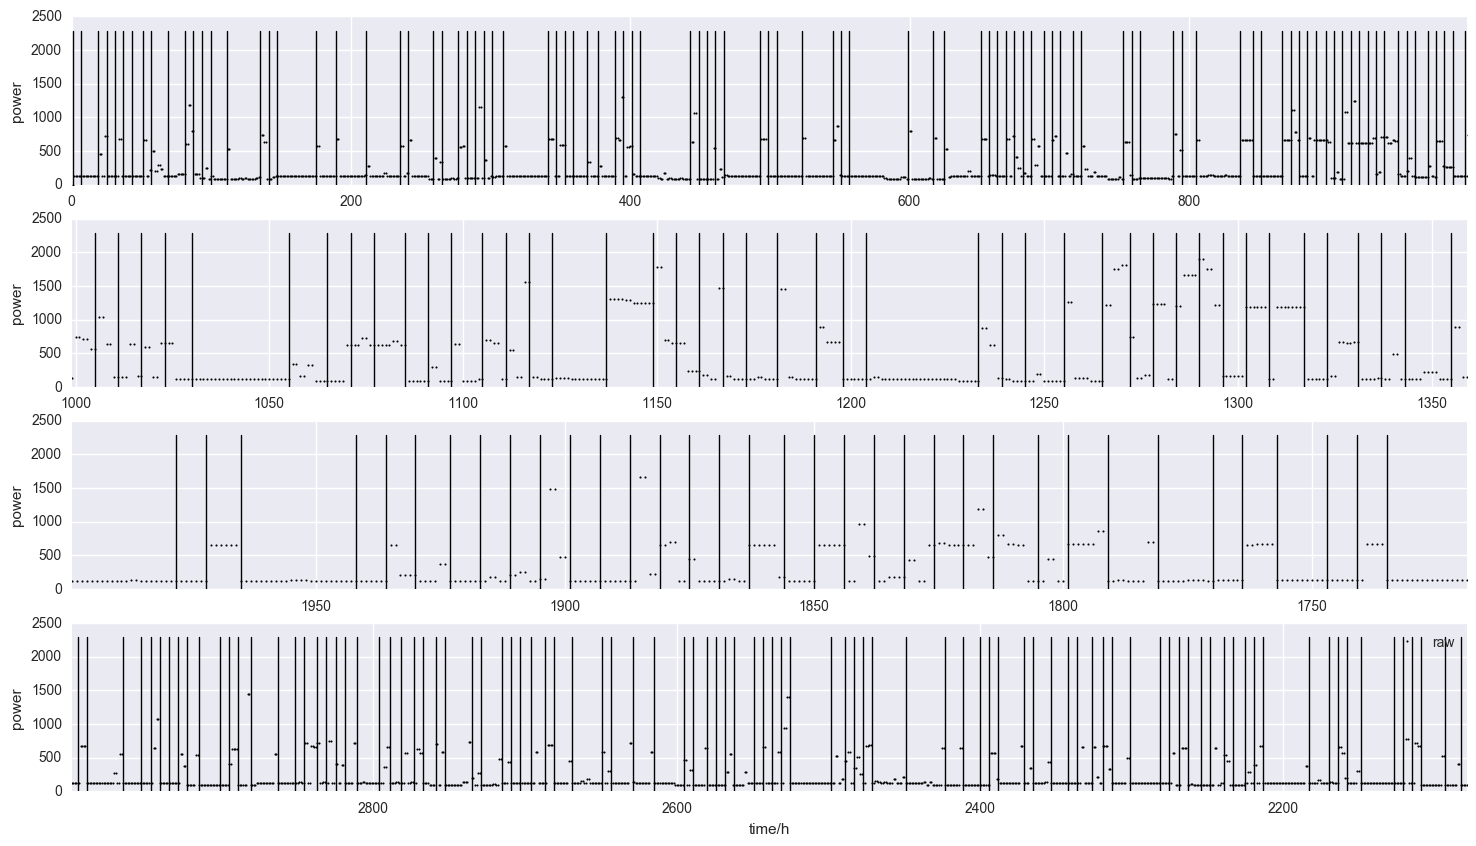

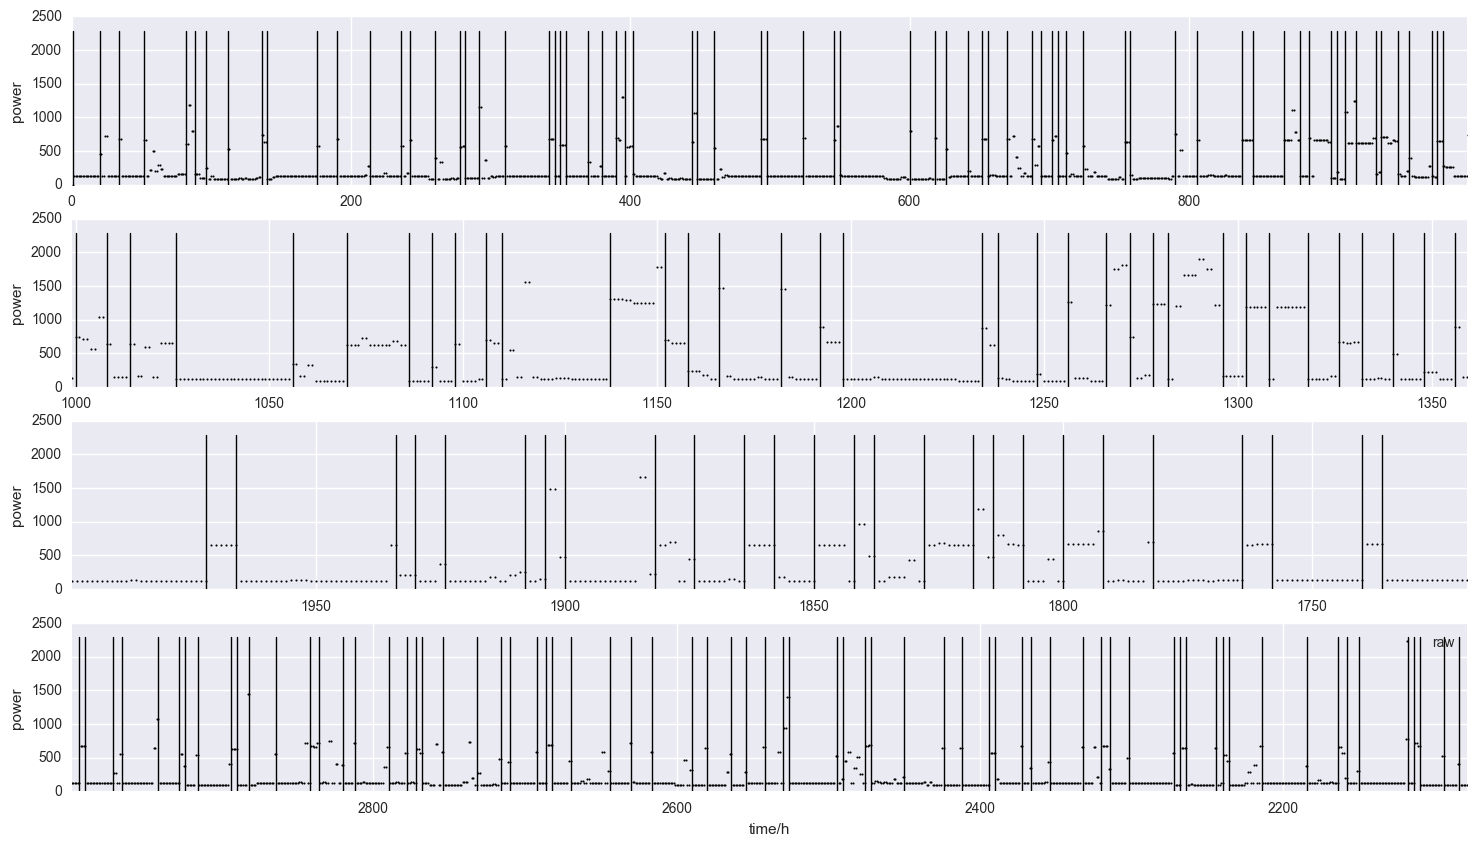

In [14]:
period = 3999
%matplotlib inline 
day = 0
cluster_mean_art = [np.array(i) for i in cluster_mean_art]
cluster_mean_2 = cluster_mean_art
predicted_profile = integrated_dissagregate(y_all,period,cluster_mean_2,day = day,n_equipment_type = len(cluster_mean_2),n_equipment=[2 for i in range(1,len(cluster_mean_2)+1)],obs_mat=n_dimension_identity_matrix(cluster_mean_2),power_usage = [i.mean() for i in cluster_mean_2],alpha = 100,r_blur = 30)

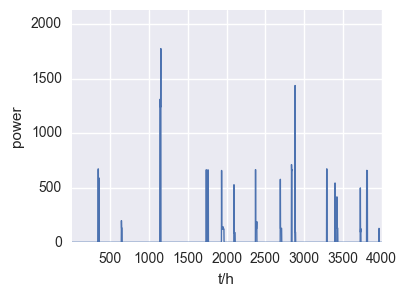

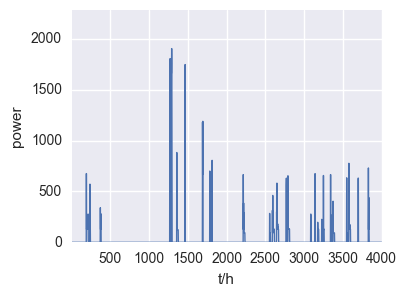

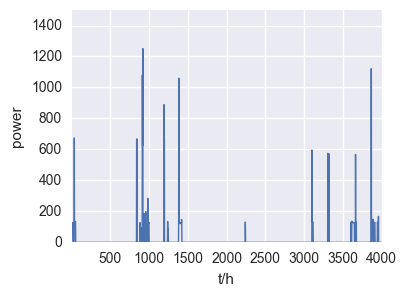

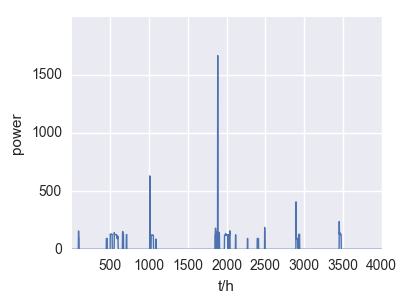

In [15]:

for i in range(len(predicted_profile)):
    plot_dissagregation([predicted_profile[i]],np.array([i+1 for i in range(max(period,len(predicted_profile[i])))]))

In [16]:
mapping_relation = {0:"2",1:"3",2:"4",3:"11"}
F1list = [Util.util.F1Score(predicted_profile[i],test_data[mapping_relation[i]].values) for i in mapping_relation]


38 144
470 3347
0.208791208791 0.0748031496063
256 82
2738 923
0.757396449704 0.0855043420174
280 0
3718 1
1.0 0.0700350175088
0 352
64 3583
0.0 0.0


In [17]:
RMSElist = [Util.util.RMSE(predicted_profile[i],test_data[mapping_relation[i]].values) for i in mapping_relation]
RMSElist

[205.21330152985013, 144.77728280156336, 228.5253097674327, 136.75207414312081]

## Some helper Functions

In [9]:
reload(bcp)
def wdayformat(tm_wday):
    if tm_wday==1:
        strwday='Mon'
    elif tm_wday==2:
        strwday='Tue'
    elif tm_wday==3:
        strwday='Wed'
    elif tm_wday==4:
        strwday='Thu'
    elif tm_wday==5:
        strwday='Fri'
    elif tm_wday==6:
        strwday='Sat'
    elif tm_wday==7:
        strwday='Sun'            
    return strwday

def readfile(f,Col): #read .csv files
    data=[]
    time=[]
    #head=''
    lines = f.readlines()
    #label=[]
    #head+=lines[0]
    for line in lines[1:]:
        line=line.strip('\n')
        line=line.split(',')
        tmp_time=float(line[0])
        tmp_data=0
        for i in range(len(Col)):
            tmp_data+=float(line[Col[i]])
        data.append(tmp_data),
        time.append(tmp_time),
    f.close()
    return (time,data)

def rel_change(y):
    """
    return relative change comparing to the closer neighbouring points
    """
    return np.min([np.abs(y[1] - y[0]), np.abs(y[1] - y[2])]) / float(y[1])

def rel_change_filter_0819_3(t, data_input, thre=.2):
    """
    filter data based on relative change
    data points in data_input that below or above both neighbouring points
    and have relative change above thre will be set as the average of neighbouring data.
    """
    thre_2 = thre/(1-thre)
    id_filter = [i for i in range(1, len(data_input)-1) 
     if (data_input[i]>data_input[i-1] and data_input[i]>data_input[i+1] and rel_change(data_input[i-1:i+2])>thre) or
                 (data_input[i]<data_input[i-1] and data_input[i]<data_input[i+1] and rel_change(data_input[i-1:i+2])>thre_2)
    ]
    data_input_2 = [(data_input[i-1]+data_input[i+1])/2 if (i in id_filter) else dat for i, dat in enumerate(data_input) ]
    return t, data_input_2

def initial_disaggregate(t_all,y_all,num_day,period = 1440):
    
    #date_current = date_start
    day = 0
    all_dat_seg = []
    while day < num_day:
        #print 'reading: ', date_current

        #t, y = read_dat_0819(date_current, 0, 23, '../new_data/IHG')
        t=np.array([i+1 for i in range(period)])
        y=y_all[(day)*period:(day+1)*period]
        t_2, y_2 = rel_change_filter_0819_3(t,y)
        mu_list_list, sigma_list_list, prob_r_list_list, r_list_list = cp_detect.bayesian_change_point_4(y_2, r_blur=30)
        changepoint, changepoint_p = cp_detect.get_change_point(prob_r_list_list)
        changepoint.append(len(t_2)-1)

        if len(changepoint)>1:
            dat_seg = [[y[cp_start:cp_end], y[cp_start-3:cp_start]] for cp_start, cp_end in zip(changepoint[:-1], changepoint[1:])]
        else:
            dat_seg = []
        all_dat_seg.extend(dat_seg)

        #date_current+=datetime.timedelta(1)
        day+=1
        
    return all_dat_seg

def plot_24h_data(t, raw_data,cp_list):
    fig, axes = plt.subplots(nrows=4, figsize=[18, 10])
    
    for i, ax in enumerate(axes):
        #ax.plot(t, data, 'r-', markersize=3, linewidth=1, label='smooth')
        ax.plot(t, raw_data, 'k.', markersize=3, label='raw')
        
        for cp in cp_list:
            ax.plot([t[cp], t[cp]], [0, max(raw_data)*1.2], 'k-', linewidth=1)
        ax.set_ylabel('power')
        ax.set_xlim([0+i*len(raw_data)/4,len(raw_data)/4+i*360])
    ax.set_xlabel('time/h')
    plt.legend()
    
def extract_first_n(data_list, n):
    return [t[:n] for t in data_list if len(t)>=n]


# integrated functions:
def integrated_clustering(t_all,y_all,num_of_days=500,period = 1440,trim=10,min_n_clusters = 4, max_n_clusters=10,hierarchical=0):
    all_seg_april = initial_disaggregate(t_all,y_all,num_of_days,period = period)
    all_seg_april_normalized = [np.array(x[0])-np.mean(x[1]) for x in all_seg_april if len(x[1])==3]
    all_seg_april_normalized = [x for x in all_seg_april_normalized if len(x)>0]
    if hierarchical == 0:
        pass
    elif hierarchical ==1:
        all_seg_april_normalized = [x for x in all_seg_april_normalized if x.mean()>1000]
    else:
        all_seg_april_normalized = [x for x in all_seg_april_normalized if x.mean()<1000]
    
    all_positive_seg_april_normalized = [x for x in all_seg_april_normalized if x.min()>0]
    
    
    all_seg_april_normalized_trim50 = extract_first_n(all_positive_seg_april_normalized, trim)
    cluster_average = []
    
    # find optimal clustering number using silhouette score
    
    optimal_dict = {}
    
    for n_clusters in range(min_n_clusters,max_n_clusters):
        
        y_pred = KMeans(n_clusters=n_clusters).fit_predict(all_seg_april_normalized_trim50)

        cluster_average = []
        for i_cluster in range(n_clusters):
            cluster_average.append(
                np.mean([np.mean(x) for i, x in enumerate(all_seg_april_normalized_trim50) if y_pred[i]==i_cluster])
            ) 

        # sihouette score
        cluster_labels = y_pred
        sample_silhouette_values = silhouette_samples(all_seg_april_normalized_trim50, cluster_labels)
        
        silhouette_avg = silhouette_score(pd.DataFrame(all_seg_april_normalized_trim50), cluster_labels)

        optimal_dict[n_clusters] = silhouette_avg +(sample_silhouette_values.min()+sample_silhouette_values.max())/2
    
    
    n_clusters = max(optimal_dict.iteritems(), key=operator.itemgetter(1))[0]

    #print n_clusters
    
    y_pred = KMeans(n_clusters=n_clusters).fit_predict(all_seg_april_normalized_trim50)

    cluster_average = []
    
    for i_cluster in range(n_clusters):
        cluster_average.append(
            np.mean([np.mean(x) for i, x in enumerate(all_seg_april_normalized_trim50) if y_pred[i]==i_cluster])
        ) 
    cluster_average_rank = np.argsort(cluster_average)[::-1]
    rank_map = {cluster_average_rank[i_cluster]:i_cluster for i_cluster in range(n_clusters)} # old index:new index

    y_pred_old = y_pred
    y_pred = [rank_map[x] for x in y_pred]
    all_seg_per_cluster = [[] for i in range(n_clusters) ]
    for i_seg in range(len(all_seg_april_normalized_trim50)):
        all_seg_per_cluster[y_pred[i_seg]].append(all_seg_april_normalized_trim50[i_seg])
        
    cluster_mean = [[] for i in range(n_clusters) ]
    cluster_std = [[] for i in range(n_clusters) ]
    for i_cluster in range(n_clusters):
        cluster_mean[ i_cluster ] = np.mean(np.array(all_seg_per_cluster[i_cluster]), axis=0)
        cluster_std[ i_cluster ] = np.std(np.array(all_seg_per_cluster[i_cluster]), axis=0)
    
    
    
    
    #cluster_mean_2 = cluster_mean[5:6]
    
    return cluster_mean,cluster_std,n_clusters,all_seg_per_cluster

def plot_cluster_result(cluster_mean,cluster_std,n_clusters,all_seg_per_cluster,trim):    
    cluster_len = trim
    color_list = sns.color_palette("hls", n_clusters)

    fig, ax = plt.subplots(nrows=5,ncols=4,figsize=[20,12]);
    ax = ax.flatten()

    for i_cluster in range(n_clusters):
        ax_current = ax[i_cluster]

        for seg in all_seg_per_cluster[i_cluster]:
            ax_current.plot(seg, '-', linewidth=1, alpha=.3, color=color_list[i_cluster])
        ax_current.set_xlim([0, cluster_len])
        ax_current.set_ylim([-50, 40])
        ax_current.plot([0,50], [0,0], 'k--')    
        ax_current.plot(cluster_mean[i_cluster], color=color_list[i_cluster])
        ax_current.fill_between(range(cluster_len)
                                , cluster_mean[i_cluster]-cluster_std[i_cluster]
                                , cluster_mean[i_cluster]+cluster_std[i_cluster]
                                , color=color_list[i_cluster], alpha=.8)
def n_dimension_identity_matrix(cluster_mean_2):
    to_return_list  = []
    for i in range(1,len(cluster_mean_2)+1):
        to_return_list.append([0 if j!=i else 1 for j in range(1,len(cluster_mean_2)+1)])
    return to_return_list

def DP_state_generation(N):
    if N==1:
        return [[0],[1]]
    else:
        return_list = DP_state_generation(N-1)
        toreturn = []
        for i in return_list:
            #print i
            i.append(0)
            toreturn.append(copy.copy(i))
            i.pop()
            i.append(1)
            #print i
            toreturn.append(copy.copy(i))
                
        #print toreturn
        return toreturn

def generate_state_prob_list(N):
    toreturn = {}
    toreturnlist = DP_state_generation(N)
    k = 1/float(len(toreturnlist))
    for i in toreturnlist:
        toreturn[tuple(i)] = k
        
    return toreturn

def integrated_dissagregate(y_all,period,cluster_mean_2,day = 65,n_equipment_type = 4,n_equipment = [2,2,2,2],obs_mat = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]),power_usage = [0,0,0,0],alpha = 10,r_blur = 30):
    
    opt = bcp.set_disaggregation_option(change_shape=cluster_mean_2, 
                               init_pos_std = np.sqrt([float(200/3), float(200/3), float(400/3), float(400/3)])
                                )
    
    t=np.array([i+1 for i in range(period)])
    data=y_all[(day)*period:(day+1)*period]
    cp_list = bcp.disaggregate(data,opt)
    
    #TEST CODE
    print cp_list
    
    t=np.array([i+1 for i in range(period)])
    y=y_all[day*period:(day+1)*period]
    t_2, y_2 = rel_change_filter_0819_3(t,y)
    mu_list_list, sigma_list_list, prob_r_list_list, r_list_list = cp_detect.bayesian_change_point_4(y_2, r_blur=r_blur)
    changepoint, changepoint_p = cp_detect.get_change_point(prob_r_list_list)
    if len(changepoint)>0 and changepoint[-1]!=len(t_2)-1:
        changepoint.append(len(t_2)-1)
    cp_list_test = changepoint
    plot_24h_data(t_2,y_2,cp_list)
    plot_24h_data(t_2,y_2,changepoint)
    
    print cp_list_test # cp_list_test is the changepoint obtained by the original bcp algorithm
    cp_list = cp_list_test
    #
    data_seg, n_seg, data_seg_raw_last = bcp.segment_data(data, cp_list)
    new_data_seg, new_n_seg, new_data_seg_raw_last = bcp.segment_data_new(data, cp_list)
    shape_matched = cluster_mean_2
    n_shape_matched = len(shape_matched)
    all_shape_code = bcp.shape_code_gen(n_shape_matched)
    shape_dict = bcp.combine_shape(shape_matched, all_shape_code)
    shape_prob_list = bcp.get_seg_prob(data_seg, shape_dict)
    
    new_shape_prob_list = bcp.get_seg_prob_positive(new_data_seg, shape_dict)
    
    #print shape_prob_list
    
    
    
    #shape_prob_list = bcp.get_seg_prob(data_seg, shape_dict)
    
    
    
    state_prob_list = generate_state_prob_list(len(cluster_mean_2))
    
    
    #obs_mat = np.array([[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])
    
    for item,keys in state_prob_list.iteritems():
        state_prob_list[item] = new_shape_prob_list[0][item]
    
    #trace_list, shape_list = bcp.viterbi(shape_prob_list, new_shape_prob_list[0], data_seg, obs_mat)
    #trace_list, shape_list = viterbi_new(shape_prob_list,state_prob_list,new_shape_prob_list,data_seg,obs_mat,power_usage)
    trace_list, shape_list = viterbi_for_missing_change_point(shape_prob_list,state_prob_list,new_shape_prob_list,data_seg,obs_mat,power_usage,alpha = alpha)
    
    predicted_profile = bcp.generate_predicted_profile(cp_list, shape_matched, shape_list, data, n_equipment_type, obs_mat, trace_list)
    
    return predicted_profile

def plot_dissagregation(predicted_profile,t):
    plt.figure(figsize = [4,3])
    maxval = 0
    for tmp in predicted_profile:
        maxval = max(maxval,max(tmp))
        plt.plot(t,tmp,linewidth = 1)
    #plt.plot(t,data,'k.',markersize = 2)
    
    plt.xlim([1,max(t)+1])
    plt.ylim([0,maxval*1.2])
    plt.xlabel('t/h')
    plt.ylabel('power')
    
def plot_dissagregation_2(predicted_profile,t):
    plt.figure(figsize = [16,8])
    for key,tmp in predicted_profile.iteritems():
        plt.plot(t,tmp,linewidth = 1)
    #plt.plot(t,data,'k.',markersize = 2)

    plt.xlim([1,1500])
    plt.ylim([0,3000])
    plt.xlabel('t/h')
    plt.ylabel('power')

def viterbi_for_missing_change_point(shape_prob_list, state_prob_list, boot_state_prob_list, data_seg, obs_mat, power_usage,alpha = 100):
    # originally shape means the 'change', state means the actual usage...
    #print "inside of function viterbi for missing change point"
    #print "shape_prob_list",shape_prob_list
    #print "data_seg",data_seg
    n_seg = len(data_seg)
    
    state_prob_list_list = [state_prob_list]
    state_memory_list_list = []
    shape_memory_list_list = []
    
    for i_seg in range(n_seg):
        seg_mean = np.mean(data_seg[i_seg])

        next_state_prob_list = {t:0 for t in state_prob_list.keys()}
        state_memory_list = {t:0 for t in state_prob_list.keys()} #
        shape_memory_list = {t:0 for t in state_prob_list.keys()} #

        for next_state, next_state_prob in next_state_prob_list.items():

            max_prob = -float('Inf')
            max_past_state = tuple()
            max_shape = ()
            #print max(shape_prob_list[i_seg].iteritems(),key = operator.itemgetter(1))[0]
            for shape_code, shape_prob in shape_prob_list[i_seg].items():# loop through all possible changes...
                #print obs_mat,shape_code
                change_state = np.dot(obs_mat, shape_code) # if the obs_mat is identity matrix then the change_state = shape_code
                past_state = tuple(np.subtract(next_state, change_state))  # find out the corresponding past_state
                if past_state in state_prob_list: # the past state should be all positive
                    if state_prob_list[past_state] * shape_prob + alpha*boot_state_prob_list[i_seg][next_state]  > max_prob:
                        max_prob = state_prob_list[past_state] * shape_prob + alpha*boot_state_prob_list[i_seg][next_state]
                        max_past_state = past_state
                        max_shape = shape_code
            state_memory_list[next_state] = max_past_state  # the table 2, noting down the most possible past state
            next_state_prob_list[next_state] = max_prob     
            shape_memory_list[next_state] = max_shape

        #print '##############'
        
        computed = sum(map(operator.mul,max(state_prob_list.iteritems(),key = operator.itemgetter(1))[0],power_usage))
        observed = sum(map(operator.mul,max(boot_state_prob_list[i_seg].iteritems(),key = operator.itemgetter(1))[0],power_usage))
        #print max(state_prob_list.iteritems(),key = operator.itemgetter(1))[0]
        #print max(boot_state_prob_list[i_seg].iteritems(),key = operator.itemgetter(1))[0]
        #print computed
        #print observed

        #if (float(computed)-float(observed))/float(observed)<0.3:
            
        state_prob_list = next_state_prob_list
        
        #print '##############'
        state_prob_list_list.append(next_state_prob_list)
        state_memory_list_list.append(state_memory_list)
        shape_memory_list_list.append(shape_memory_list)


    trace_list = []
    shape_list = []

    end_state = sorted(state_prob_list_list[-1].items(), key=operator.itemgetter(1))[-1][0]
    trace_list.insert(0, end_state)
    #print "end state",end_state
    #print "shape_memory_list_list",shape_memory_list_list
    #print "state_memory_list_list",state_memory_list_list
    
    for i in reversed(range(n_seg)):
        #print "error"
        print shape_memory_list_list[i]
        max_shape = shape_memory_list_list[i][end_state]
        end_state = state_memory_list_list[i][end_state]
        trace_list.insert(0, end_state)
        shape_list.insert(0, max_shape)

    return trace_list, shape_list

def l2_distance(list_1, list_2, last_point_w = 50, n=2):
    dis = 0
    tmp = [(x-y)**n for x,y in zip(list_1, list_2)]
    dis = np.sum( tmp )
    if len(list_1) >= len(list_2):
        dis+=last_point_w*(list_1[-1] - list_2[-1])**n
    return dis / (len(tmp)+last_point_w)

# usage_list = {'1':[50,100],'2':[1500,1700]...}
def backend_construct_equip_to_shape_map(cluster_mean,usage_list,shape_max = 2):
    
    equip_to_shape_map = {}
    
    for appliance_name,appliance_usage in usage_list.iteritems():
        equip_to_shape_map[appliance_name] = []
        usage_array = [float(appliance_usage[0]+appliance_usage[1])/2.0 for i in cluster_mean_2[0]]
        distance_dict = {row+1: l2_distance(cluster_mean[row],usage_array,last_point_w = 1)  for row in range(len(cluster_mean_2))}
        local_shape_max = shape_max
        while local_shape_max>0:
            temp = min(distance_dict.iteritems(),key = operator.itemgetter(1))[0]
            equip_to_shape_map[i].append(temp)
            del distance_dict[temp]
            local_shape_max=local_shape_max-1
        return equip_to_shape_map
    
# add new cluster_result to old cluster_result
def backend_add_new_cluster_result(old_cluster_mean,new_cluster_mean):
    
    for new_data in new_cluster_mean:
        distance_dict = {row+1: l2_distance(old_cluster_mean[row],new_data,last_point_w = 1) for row in range(len(old_cluster_mean))}
        temp_min_distance = min(distance_dict.iteritems(),key = operator.itemgetter(1))[1]
        if float(temp_min_distance)/float(l2_distance([0 for i in old_cluster_mean[0]],new_data))>0.1:
            old_cluster_mean.append(new_data)
            #temp = min(distance_dict.iteritems(),key = operator.itemgetter(1))[0]
        return new_data

    
        
def construct_equip_to_shape_map(cluster_mean_2,exact_usage_list):
    equip_to_shape_map = {}
    #equip_to_shape_map = defaultdict(list)
    #picked_list = [i for i in range(1,len(exact_usage_list)+1)]
    # only use non zero value to compute mean
    #mean_list=[np.array([y for y in x if y>0]).mean() for x in exact_usage_list]
    mean_list=[i.mean() for i in cluster_mean_2]
    #mean_list = [x.mean() for x in exact_usage_list]
    #
    for i in range(1,len(exact_usage_list)+1):
        equip_to_shape_map[i] = []
        #mean = cluster_mean_2[i-1].mean()
        non_zero_array = np.array([y for y in exact_usage_list[i-1] if y>0])
        #print non_zero_array
        distance_dict = { row+1 : (exact_usage_list[i-1].max()-mean_list[row])*(exact_usage_list[i-1].max()-mean_list[row]) for row in range(len(cluster_mean_2))}
        #distance_dict = { row+1 : (non_zero_array.mean()-mean_list[row])*(non_zero_array.mean()-mean_list[row]) for row in range(len(cluster_mean_2))}

        temp = min(distance_dict.iteritems(),key = operator.itemgetter(1))[0]
        equip_to_shape_map[i].append(temp)
        del distance_dict[temp]
        temp = min(distance_dict.iteritems(),key = operator.itemgetter(1))[0]
        equip_to_shape_map[i].append(temp)
        del distance_dict[temp]
        temp = min(distance_dict.iteritems(),key = operator.itemgetter(1))[0]
        equip_to_shape_map[i].append(temp)
        #picked_list.remove(equip_to_shape_map[i])
    return equip_to_shape_map

def construct_shape_to_equip_map(cluster_mean_2,exact_usage_list):
    equip_to_shape_map = {}
    picked_list = [i for i in range(1,len(exact_usage_list)+1)]
    # only use non zero value to compute mean
    mean_list=[np.array([y for y in x if y>0]).mean() for x in exact_usage_list]
    #mean_list = [x.mean() for x in exact_usage_list]
    for i in range(1,len(cluster_mean_2)+1):
        mean = cluster_mean_2[i-1].mean()
        distance_dict = { row : (mean_list[row-1]-mean)*(mean_list[row-1]-mean) for row in picked_list }
        equip_to_shape_map[i] = min(distance_dict.iteritems(),key = operator.itemgetter(1))[0]
        
        picked_list.remove(equip_to_shape_map[i])
    return equip_to_shape_map

def get_n_day_origin_data(filename='/Users/Simo/Desktop/equota/disaggrREDD/house1_output15s',filext='.dat',period = 1440,N = 65,AppNo=[3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20]):
    f_input = file(filename+filext,'r')
    #AppNo=[3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20] #Choose App#
    ytemp = []
    for ii in AppNo:
        f_input = file(filename+filext,'r')
        (t_all,y_all)=np.array(readfile(f_input,[i-2 for i in [ii]]))
        t=np.array([i+1 for i in range(period)])
        ytemp.append(y_all[N*period:(N+1)*period])
    return ytemp

### Test on Redd Data

In [7]:
# change the following path to your local repository of energyanalytics
mod_path = '/Users/Simo/Documents/EquotaCode/Disaggregation/disaggregation/energyanalytics/source/disaggregation'
import pandas as pd
import numpy as np
if not (mod_path in sys.path):
    sys.path.insert(0, mod_path)
import Util
reload(Util)
test = Util.ReddData()
test.get_appliance_data()
test.compute_total(appliance_list = test.appliance_list)

TypeError: unsupported operand type(s) for -: 'str' and 'int'